In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import os, os.path

path = os.getcwd() 

df = pd.read_csv( '/content/drive/MyDrive/MCI/data for armankade.csv', sep='\t')
df.head()

,line,text,average tag
0,1,با تشکر از شما آقای عباسی,POSITIVE
1,2,برنامه خندوانه به زندگی ما انرژی داده مرسی,POSITIVE
2,3,مواظب کلیدت باش تو برفا گم نشه ،شب خونه راهت ن...,NEGATIVE
3,4,مایه افتخار ما شیرازی هاست که آقا اومدن اونجا ...,POSITIVE
4,5,@_zahra_str_75 بیخیار سالاد نمیشه,NATURAL


In [ ]:
!pip install emoji

In [ ]:
!pip install hazm

In [7]:
import emoji
import regex
import re
from hazm import Normalizer
from hazm import stopwords_list

normalizer = Normalizer()
punctuation_signs = list("?:!.,;")

def clean_text(text,normalizer=normalizer):
    text=  emoji.demojize(text)
    text= re.sub(r'(:[!_\-\w]+:)', '', text)
    text= re.sub(r'@\w+', ' ', text)
    text =  text.replace("#", " ")
    text =  text.replace("-", " ")
    text =  text.replace("_", " ")
    
    for i in punctuation_signs:
         text = text.replace(i,'')
    return text

def split_text(sentence):
    tokens = sentence.strip().split(' ')
    filtered_tokens = []
    for i in tokens:
        if(i not in stopwords_list()):
            filtered_tokens.append(i)
    return filtered_tokens

def demojize(liiist):
    
    z = []
    for item in liiist:
        z.append(emoji.demojize(item))
    return z

df['emoji'] = df['text'].apply(lambda x : emoji.distinct_emoji_list(x))
#df['sentence_tokens'] = df['text'].apply(lambda x : x.strip().split(' '))
df['text'] = df['text'].apply(lambda x : clean_text(x))
df['text_split'] = df['text'].apply(lambda x :split_text(x))
#df['text'] = df['text'].replace('\d+', '')
df['emoji'] = df['emoji'].apply(lambda x : demojize(x))


In [8]:
df['context'] = df['text_split']+df['emoji']
df['context'] = df['context'].apply(lambda x: " ".join(x))
df.head()

,line,text,average tag,emoji,text_split,context
0,1,با تشکر از شما آقای عباسی,POSITIVE,[],"[تشکر, عباسی]",تشکر عباسی
1,2,برنامه خندوانه به زندگی ما انرژی داده مرسی,POSITIVE,[],"[برنامه, خندوانه, زندگی, انرژی, مرسی]",برنامه خندوانه زندگی انرژی مرسی
2,3,مواظب کلیدت باش تو برفا گم نشه ،شب خونه راهت ن...,NEGATIVE,[],"[مواظب, کلیدت, باش, برفا, گم, نشه, ،شب, خونه, ...",مواظب کلیدت باش برفا گم نشه ،شب خونه راهت نمیدن
3,4,مایه افتخار ما شیرازی هاست که آقا اومدن اونجا ...,POSITIVE,"[:blossom:, :tulip:, :cherry_blossom:]","[مایه, افتخار, شیرازی, هاست, آقا, اومدن, اونجا...",مایه افتخار شیرازی هاست آقا اومدن اونجا قربون...
4,5,بیخیار سالاد نمیشه,NATURAL,[],"[بیخیار, سالاد, نمیشه]",بیخیار سالاد نمیشه


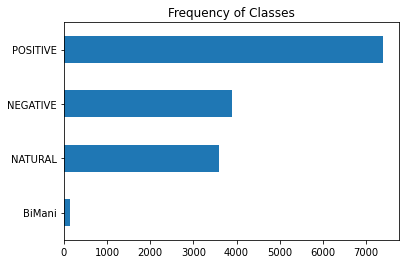

In [9]:
import matplotlib.pyplot as plt
df["average tag"].value_counts(ascending=True).plot.barh()
plt.title("Frequency of Classes")
plt.show()

In [10]:
BiMani_split_text_lists = list(df[df['average tag'] == 'BiMani']['text_split'])
BiMani_split_emoji_lists = list(df[df['average tag'] == 'BiMani']['emoji'])


def flatten(l):
    return [item for sublist in l for item in sublist]

BiMani_split_text_list = flatten(BiMani_split_text_lists)
BiMani_split_emoji_list = flatten(BiMani_split_emoji_lists)

In [11]:
import random 
import pandas as pd

len_Natural_class = df["average tag"].value_counts()['NATURAL']
len_BiMani_class = df["average tag"].value_counts()['BiMani']
mean_sentence_len = int(df["text_split"].str.len().mean())
mean_emoji_len = 2

len_BiMani_split_text_list = len(BiMani_split_text_list)
len_BiMani_split_emoji_list = len(BiMani_split_emoji_list)

line_num = len(df)+1

lines = []
texts = []
average_tags = []
emojis = []
text_splits = []
contexts = []

for counter in range(len_Natural_class-len_BiMani_class):
     token_num = random.randint(1, mean_sentence_len)
     emoji_num = random.randint(0,mean_emoji_len)
     text_split_list = []
     emoji_list = []
     
     if( random.randint(0,1) == 1):
         for i in range(emoji_num):
                emoji_indx = random.randint(0,len_BiMani_split_emoji_list-1)
                emoji_list.append(BiMani_split_emoji_list[emoji_indx])

     for i in range(token_num):
            token_indx = random.randint(0,len_BiMani_split_text_list-1)
            text_split_list.append(BiMani_split_text_list[token_indx])
            
     
     lines.append(line_num)
     texts.append(' '.join(text_split_list))
     average_tags.append('BiMani')
     emojis.append(emoji_list)
     text_splits.append(text_split_list)
     contexts.append(' '.join(text_split_list+emoji_list))
     line_num += 1
        
dict_df = {'line':lines ,
                'text': texts,
                'average tag':average_tags ,
                'emoji' :emojis,
                'text_split':text_splits ,
                'context': contexts
                }

df2 = pd.DataFrame.from_dict(dict_df, orient='index')
df2 = df2.transpose()

df = pd.concat([df,df2],ignore_index=True)

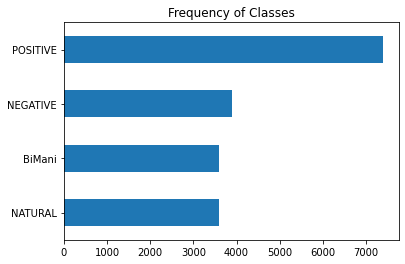

In [12]:
df["average tag"].value_counts(ascending=True).plot.barh()
plt.title("Frequency of Classes")
plt.show()

In [37]:
label_dict = {'POSITIVE':0 , 'NEGATIVE':1 , 'NATURAL':2 , 'BiMani':3}
df['label'] = df['average tag'].apply(lambda x : label_dict[x])

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer

y = df['label'].values
encoder = LabelBinarizer()
y_oh = encoder.fit_transform(y)

x_train, x_test, y_train, y_test= train_test_split(df['context'].values,
                                                   y_oh,
                                                   test_size = 0.2,
                                                   stratify = y_oh,
                                                   random_state = 1,
                                                   shuffle = True)

x_train, x_val, y_train, y_val= train_test_split( x_train,
                                                  y_train,
                                                  test_size=0.2,
                                                  stratify = y_train,
                                                  random_state=1,
                                                  shuffle = True) # 0.25 x 0.8 = 0.2


In [40]:
import numpy as np
def read_fasttext_vecs(fasttext_file):
    with open(fasttext_file, encoding="utf-8") as f:
        c=0
        words = set()
        word_to_vec_map = {}
        for line in f:
            line = line.strip().split()
            curr_word = line[0]
            words.add(curr_word)
            c=c+1
            word_to_vec_map[curr_word] = np.array(line[1:], dtype=np.float64)
        
        i = 1
        words_to_index = {}
        index_to_words = {}
        for w in (words):
            words_to_index[w] = i
            index_to_words[i] = w
            i = i + 1
    return words_to_index, index_to_words, word_to_vec_map

# Dictionary mapping words to their fasstest vector representation
word_to_index, index_to_word, word_to_vec_map = read_fasttext_vecs('/content/drive/MyDrive/MCI/cc.fa.300.vec')


In [43]:
def sentence_to_avg(sentence, word_to_vec_map):
    # Split sentence into list of words
    words = sentence.split(' ')
    # Initialize the average word vector, should have the same shape as your word vectors(300d refering to dimention of pre-trained fasttext embedding file).
    avg = np.zeros((300,))
    # average the word vectors. You can loop over the words in the list "words".
    for w in words:
        try:
            vec=word_to_vec_map[w]
        except :
            vec=np.zeros((300,))
        avg += vec
    avg = avg/len(words)

    return avg

In [48]:
avg_train=[]
for i in range(len(x_train)):
    avg_train.append(sentence_to_avg(x_train[i],word_to_vec_map))

avg_val=[]
for i in range(len(x_val)):
    avg_val.append(sentence_to_avg(x_val[i],word_to_vec_map))


avg_test=[]
for i in range(len(x_test)):
    avg_test.append(sentence_to_avg(x_test[i],word_to_vec_map))

In [66]:
import tensorflow.keras as keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

batch_size = 128
num_classes = 4
epochs = 30
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(300,)))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))
model.summary()
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(),
              metrics=['accuracy'])
# Train the model
history = model.fit(x= np.array(avg_train), y = y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1
                    ,validation_data = (np.array(avg_val),y_val)
                    )
# Save the model
model.save('my_model.h5')
# Print evaluation of the model on test data
score = model.evaluate(np.array(avg_test), y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])


Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_51 (Dense)            (None, 512)               154112    
                                                                 
 dropout_31 (Dropout)        (None, 512)               0         
                                                                 
 dense_52 (Dense)            (None, 4)                 2052      
                                                                 
Total params: 156,164
Trainable params: 156,164
Non-trainable params: 0
_________________________________________________________________
Epoch 1/30
93/93 [==============================] - 2s 11ms/step - loss: 1.0367 - accuracy: 0.5562 - val_loss: 0.8635 - val_accuracy: 0.6513
Epoch 2/30
93/93 [==============================] - 1s 10ms/step - loss: 0.8094 - accuracy: 0.6763 - val_loss: 0.8041 - val_accuracy: 0.6781
Epoch 3/30
93/93 [===========